In [43]:
import pandas as pd

train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv') 

print(train_data.head())
print(test_data.head())


   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [45]:
train_data = train_data.drop(columns=['Unnamed: 0', 'id'])
test_data = test_data.drop(columns=['Unnamed: 0', 'id'])


In [47]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].median())

test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())



Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
Gender                                0
Cust

TypeError: Cannot convert [['Male' 'Male' 'Female' ... 'Male' 'Female' 'Male']
 ['Loyal Customer' 'disloyal Customer' 'Loyal Customer' ...
  'disloyal Customer' 'disloyal Customer' 'Loyal Customer']
 ['Personal Travel' 'Business travel' 'Business travel' ...
  'Business travel' 'Business travel' 'Business travel']
 ['Eco Plus' 'Business' 'Business' ... 'Business' 'Eco' 'Business']
 ['neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied' ...
  'neutral or dissatisfied' 'neutral or dissatisfied'
  'neutral or dissatisfied']] to numeric

In [49]:
train_data['Gender'] = train_data['Gender'].map({'Male': 0, 'Female': 1})
test_data['Gender'] = test_data['Gender'].map({'Male': 0, 'Female': 1})

train_data = pd.get_dummies(train_data, columns=['Type of Travel', 'Customer Type', 'Class'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Type of Travel', 'Customer Type', 'Class'], drop_first=True)

train_data['satisfaction'] = train_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})


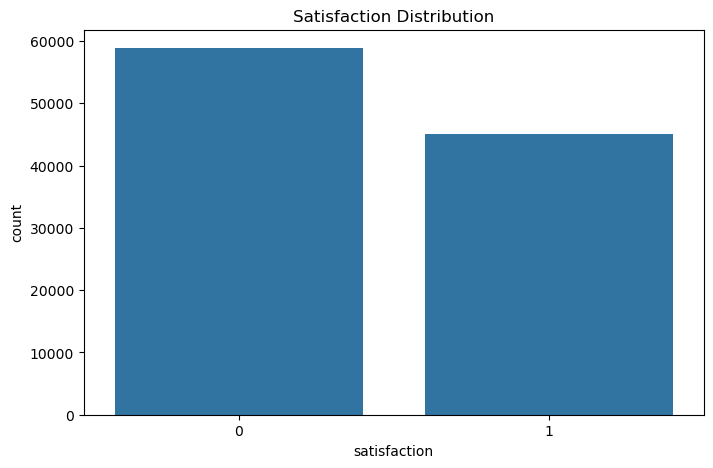

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction', data=train_data)
plt.title('Satisfaction Distribution')
plt.show()


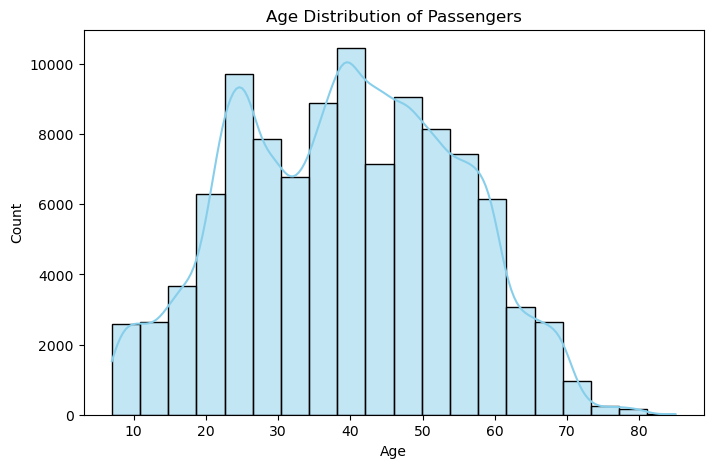

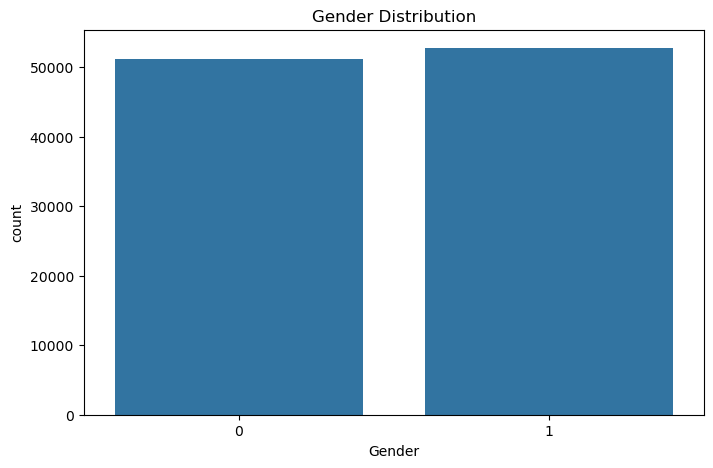

In [31]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=train_data)
plt.title('Gender Distribution')
plt.show()


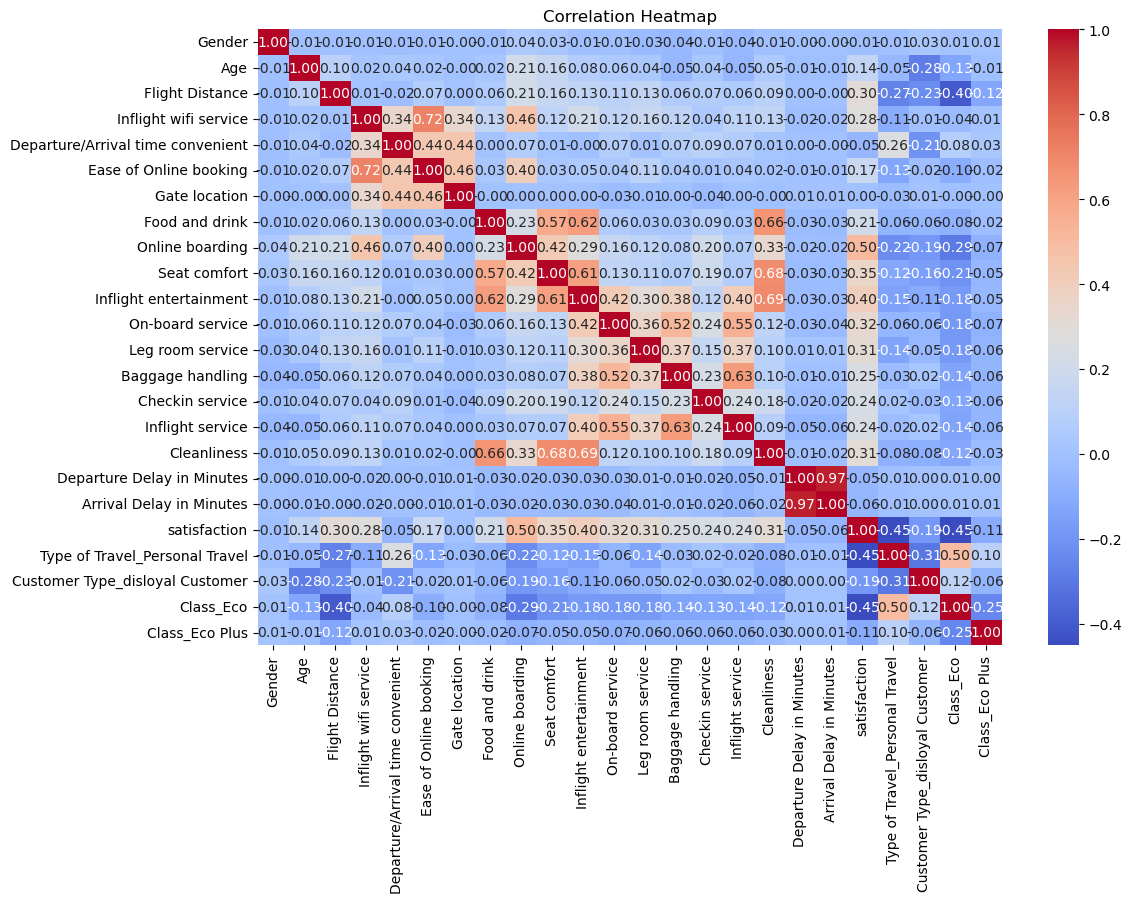

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


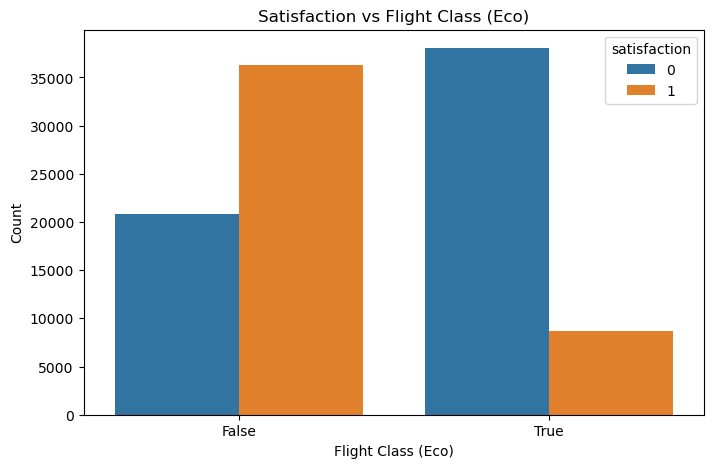

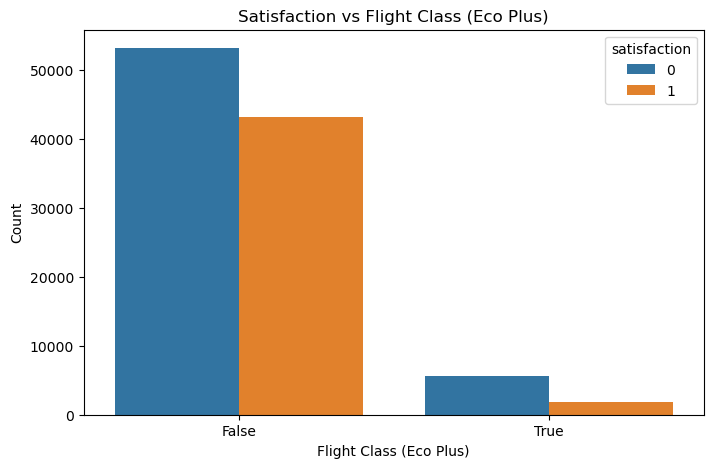

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class_Eco', hue='satisfaction', data=train_data)
plt.title('Satisfaction vs Flight Class (Eco)')
plt.xlabel('Flight Class (Eco)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Class_Eco Plus', hue='satisfaction', data=train_data)
plt.title('Satisfaction vs Flight Class (Eco Plus)')
plt.xlabel('Flight Class (Eco Plus)')
plt.ylabel('Count')
plt.show()
